### 문제
1. 시계열 데이터 불러와서 정상성/이분산성 검증

2. 정상성 파악 근거에 따른 고정시계열 여부 파악

3. SARIMA 분석 및 최적 모형 파라미터 선택

4. 잔차 그래프 출력

- 시계열 데이터 불러와서 정상성/이분산성 검증

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

series=pd.read_csv('market-price.csv', header=0, names=['day', 'price'])
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     366 non-null    object 
 1   price   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
series['day']=series['day'].astype(str)
series['day']=pd.to_datetime(series['day'])

In [10]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     366 non-null    datetime64[ns]
 1   price   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [11]:
series.set_index('day', inplace=True)
series.tail()

,price
day,
2022-08-26,21597.93
2022-08-27,20233.32
2022-08-28,20035.59
2022-08-29,19550.07
2022-08-30,20290.41


In [12]:
interval=30
rolmean=series.rolling(interval).mean()
rolstd=series.rolling(interval).std()

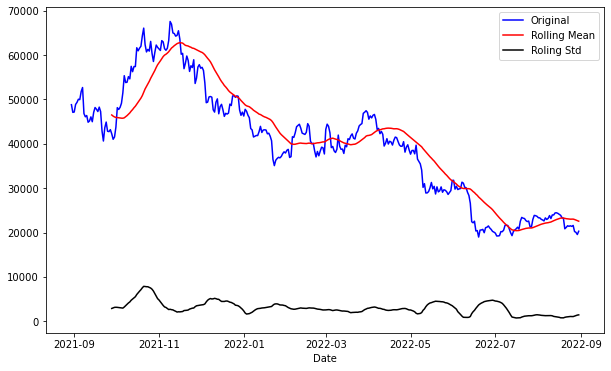

In [13]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
orig=plt.plot(series, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean')
std=plt.plot(rolstd, color='black', label='Roling Std')
plt.legend(loc='best')
plt.show()

정상 시계열인지 보려면 평균, 분산이 일정해야하는데 정규성, 이분산성을 시각화하는 것이 문제로 나왔지, 검증하라고 나온 적은 없다.

평균은 꾸준히 하락하는 추세이며, 분산도 중간중간 값이 올라가는 것을 볼 수 있다.

추세요인, 계절요인, 불규칙 요인은 이제 seasonal_decompose를 불러와서 그리면됨

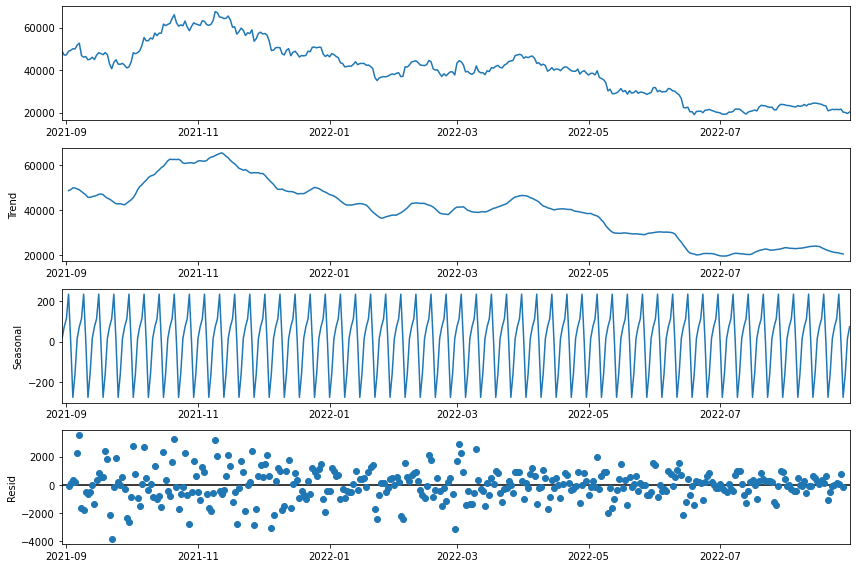

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=series
result=seasonal_decompose(ts, model='additive')
plt.rcParams['figure.figsize']=[12,8]
result.plot()
plt.show()

In [ ]:
시계열 분해를 해주었을 때, 해당데이터는 Trend와 Seasonal이 명확하게 존재하

- 정상성 파악 근거에 따른 고정시계열 여부 파악